# Deep learning

standard NN , Convocational NN, Recurrent NN are types of deep learning algorithms

Structured Data: each featured is labeled and well defined (price, size,etc.)

Unstructured Data: images, sound ; features are not well defined

Deep learning is able to make sense of large amounts of data compared to traditional ML techniques


# Binary Classification

n_x = features

m = samples

Training Data: X.shape == (n_x, m)

y.shape == (1,m)

predicting if something is true or false (binary)


# Logistic Regression

Binary classification where target value is either 0 or 1

given our inputs `x` = `[x_1,x_2,...]` and weights `w` = `[w_1,w_2,...]` `b` = `[b]` we want to know the probability that y_hat == 1

```python

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

y_hat = sigmoid(w.T @ X + b)
```

We want to find values w and b that when used in our equation returns value y_hat that is similar to y

To gain a metric of how close the predicted answer (y_hat) is to y use a loss function

```python
def bce_function(y, y_hat):
    return (-y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
```

Loss tells us how close a single prediction is to its target value

Cost tells us how close many predictions are to their target value

```python
J = cost = np.mean(bce_function(y,y_hat))
```

![img](https://media.geeksforgeeks.org/wp-content/uploads/20231008131358/file.png)

## Gradient Decent

using partial derivate of weights, nudge our weights into the direction that minimizes our loss function

new_w = w - (learning_rate * dJ_wrt_dw)

# Computation Graph

All operations in neural net are represented in a graph

On forward pass all intermediate results of operations are stored

On back pass when computing gradient of Weights, these intermediate results are used to compute the partial derivative of every value via chain rule



In [ ]:
#simple binary classifier

import numpy as np

def bce_function(y_true, y_predicted):
    """Binary Cross entropy"""
    eps=1e-7
    #clip any value smaller than eps as log(0) == Nan
    y_predicted = np.clip(y_predicted, eps, 1 - eps)  
    loss = -np.mean(y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted))
    return loss

def bce_grad(y_true, y_predicted):
    eps=1e-7
    y_predicted = np.clip(y_predicted, eps, 1 - eps)
    grad = (y_predicted - y_true) / (y_predicted * (1 - y_predicted) )
    return grad

def sigmoid_function(x):
    return 1 / ( 1 + np.exp(-x))
    pass
def sigmoid_grad(x):
    sigmoid = 1 / ( 1 + np.exp(-x))
    return sigmoid * (1 - sigmoid)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data.T
y = iris.target # range is 0,1,2

#convert into binary data, 
y = y == 0 

names = iris.target_names

w = np.random.rand(X.shape[0]).astype(float)
b = np.random.rand(1).astype(float)

n,m = X.shape

learning_rate = 0.01
for i in range(10000):

    # Forward pass
    # z = w.T @ X + b
    z = np.dot(w,X)+ b
    a = sigmoid_function(z)
    loss = bce_function(y, a)
    
    # Back pass
    dL_wrt_da = bce_grad(y, a)
    da_wrt_dz = sigmoid_grad(z)  
    dz = dL_wrt_da * da_wrt_dz

    #bce_grad and sigmoid_grad simply to be dz = a - y

    w_grad = (X @ dz.T) /m  # dL wrt w 
    b_grad = np.sum(dz) /m # dL wrt db

    # Update parameters
    w -= learning_rate * w_grad
    b -= learning_rate * b_grad

    # Print loss every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")

Iteration 0, Loss: 8.3447
Iteration 100, Loss: 0.4444
Iteration 200, Loss: 0.2711
Iteration 300, Loss: 0.1905
Iteration 400, Loss: 0.1461
Iteration 500, Loss: 0.1185
Iteration 600, Loss: 0.0997
Iteration 700, Loss: 0.0862
Iteration 800, Loss: 0.0760
Iteration 900, Loss: 0.0680
Iteration 1000, Loss: 0.0615
Iteration 1100, Loss: 0.0562
Iteration 1200, Loss: 0.0518
Iteration 1300, Loss: 0.0481
Iteration 1400, Loss: 0.0449
Iteration 1500, Loss: 0.0421
Iteration 1600, Loss: 0.0396
Iteration 1700, Loss: 0.0374
Iteration 1800, Loss: 0.0355
Iteration 1900, Loss: 0.0337
Iteration 2000, Loss: 0.0322
Iteration 2100, Loss: 0.0308
Iteration 2200, Loss: 0.0295
Iteration 2300, Loss: 0.0283
Iteration 2400, Loss: 0.0272
Iteration 2500, Loss: 0.0262
Iteration 2600, Loss: 0.0252
Iteration 2700, Loss: 0.0244
Iteration 2800, Loss: 0.0236
Iteration 2900, Loss: 0.0228
Iteration 3000, Loss: 0.0221
Iteration 3100, Loss: 0.0215
Iteration 3200, Loss: 0.0209
Iteration 3300, Loss: 0.0203
Iteration 3400, Loss: 0.01

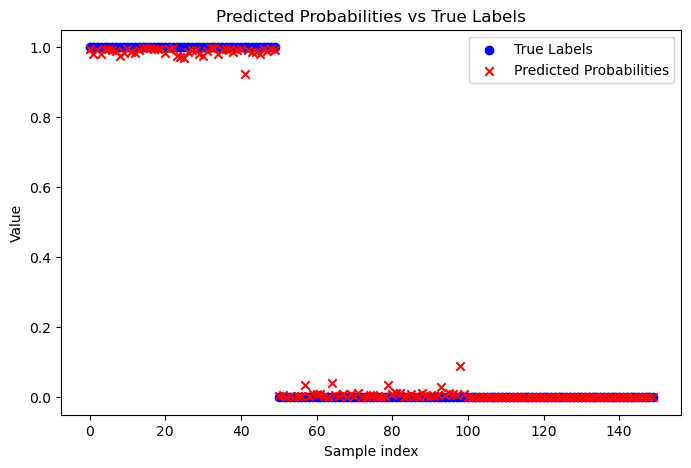

In [311]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(y)), y, label="True Labels", color='blue', marker='o')
plt.scatter(range(len(a)), a, label="Predicted Probabilities", color='red', marker='x')
plt.xlabel("Sample index")
plt.ylabel("Value")
plt.title("Predicted Probabilities vs True Labels")
plt.legend()
plt.show()

# Vectorization

python for loops are slow, use numpy functions when possible

np.reshape is really cheap to make sure vectors are in right format

https://numpy.org/devdocs/user/basics.broadcasting.html

Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.

Recommends to not use rank 1 arrays
```python
np.zero((5,1)) # column vector
np.zero((1,5)) # row vector
```
use asserts for checking shape is correct after an operation

In [325]:
A = np.array([
    [0,1,2,3,4],
    [10,11,12,13,14],
    [20,21,22,23,24],
])
A / np.sum(A,axis=0)

array([[0.        , 0.03030303, 0.05555556, 0.07692308, 0.0952381 ],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.63636364, 0.61111111, 0.58974359, 0.57142857]])